In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('Housing.csv')  # update the filename as per your file
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


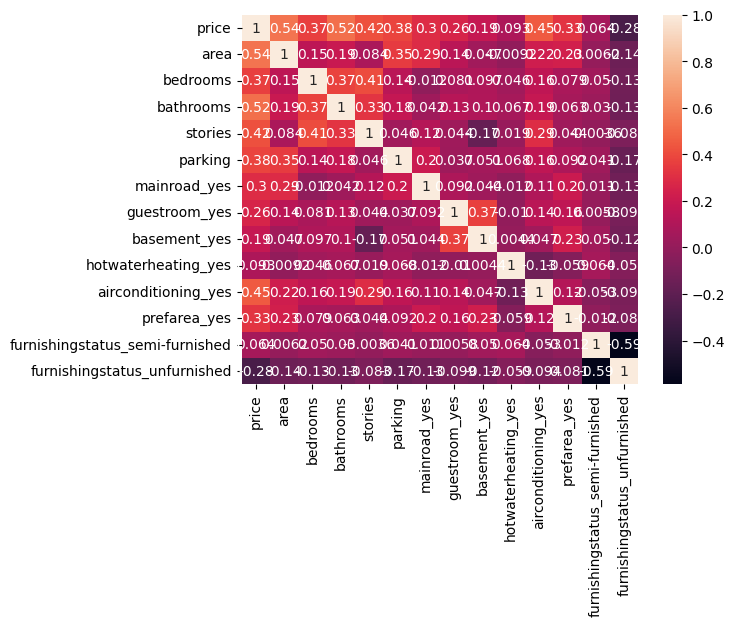

In [6]:
# Check for nulls
print(df.isnull().sum())

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Optional: visualize correlations
sns.heatmap(df.corr(), annot=True)
plt.show()


In [7]:
X = df.drop('price', axis=1)  # assuming 'price' is the target
y = df['price']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


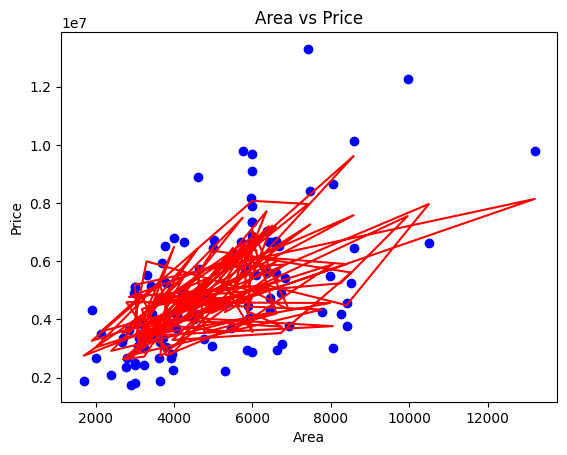

In [11]:
plt.scatter(X_test['area'], y_test, color='blue')
plt.plot(X_test['area'], y_pred, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()


In [12]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
